In [15]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print(".", end="")
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end="")
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print()
    return df

In [7]:
# Load Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39", "SnapshotAr39")
prefix = "SnapshotAr39_*csv"

df_ar39 = load_dataframe_from_files(dirin, prefix, max_files=30)
df_ar39 = df_ar39[df_ar39.columns[:-1]]
df_ar39 = df_ar39[df_ar39.pedetected>0]

..............................


In [8]:
# Load Muons
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons", "SnapshotMuons")
prefix = "SnapshotMuons_*csv"

df_mu = load_dataframe_from_files(dirin, prefix, max_files=100)
df_mu = df_mu[df_mu.columns[:-1]]
df_mu = df_mu[df_mu.pedetected>0]

....................................................................................................


In [9]:
print("[Info] Loaded {} Ar39 instances".format(len(df_ar39)))
print("[Info] Loaded {} Muons instances".format(len(df_mu)))

[Info] Loaded 1892861 Ar39 instances
[Info] Loaded 14737 Muons instances


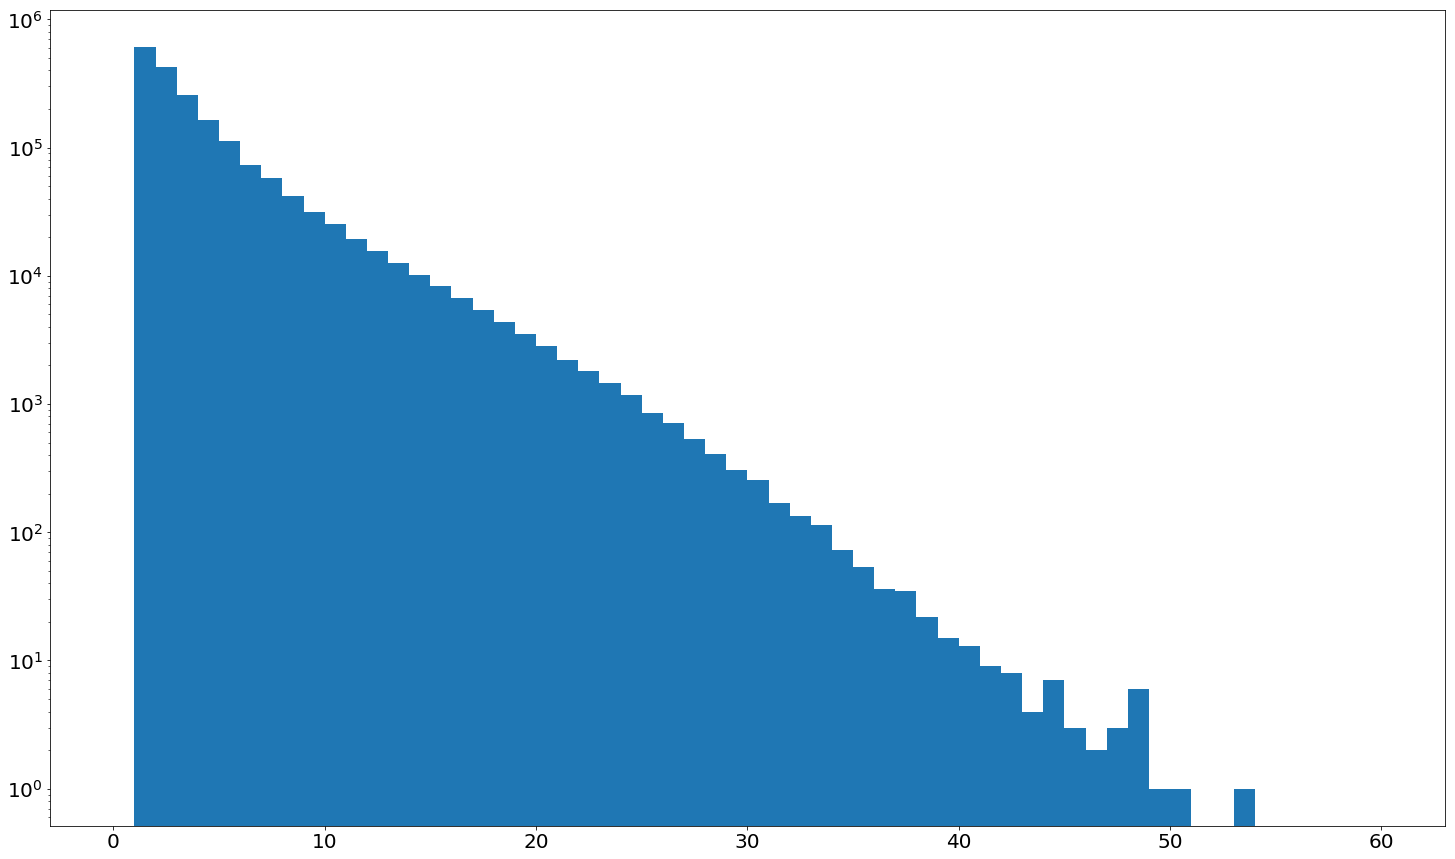

In [16]:
# Safety check: plot pe spectrum
bins = np.linspace(0, 60, 61)
plt.hist(df_ar39.pedetected, bins=bins)
plt.yscale("log")
plt.show()

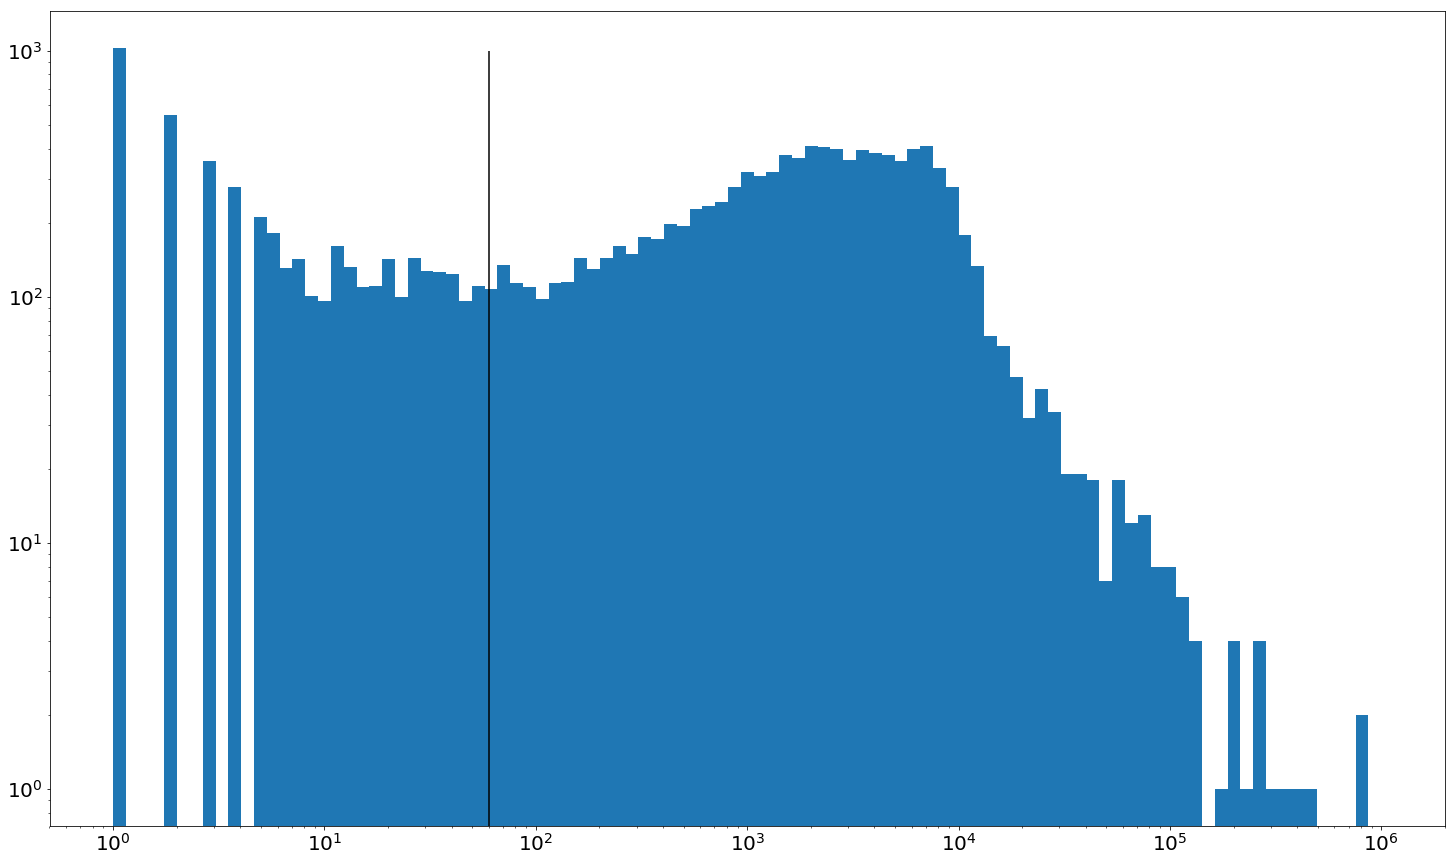

In [22]:
bins = np.logspace(0, 6, 100)
plt.hist(df_mu.pedetected, bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.vlines(60, ymin=0, ymax=1000)
plt.show()

# Spread of detections (after introducing the Spatial Map)

In [26]:
def stddev_idslices_fun(row):
    # given an array of aquisitions, it return the std of activated slices
    # it create a populaion of slice ids, and compute stddev on them
    rownp = row.to_numpy()
    return np.std(np.repeat(np.argwhere(rownp>0), rownp[rownp>0]))

In [31]:
mu_std = df_mu.iloc[:, 3:].apply(stddev_idslices_fun, axis=1)

In [41]:
lemu_std = df_mu[df_mu.pedetected<=60].iloc[:, 3:].apply(stddev_idslices_fun, axis=1)

In [32]:
ar39_std = df_ar39.iloc[:, 3:].apply(stddev_idslices_fun, axis=1)

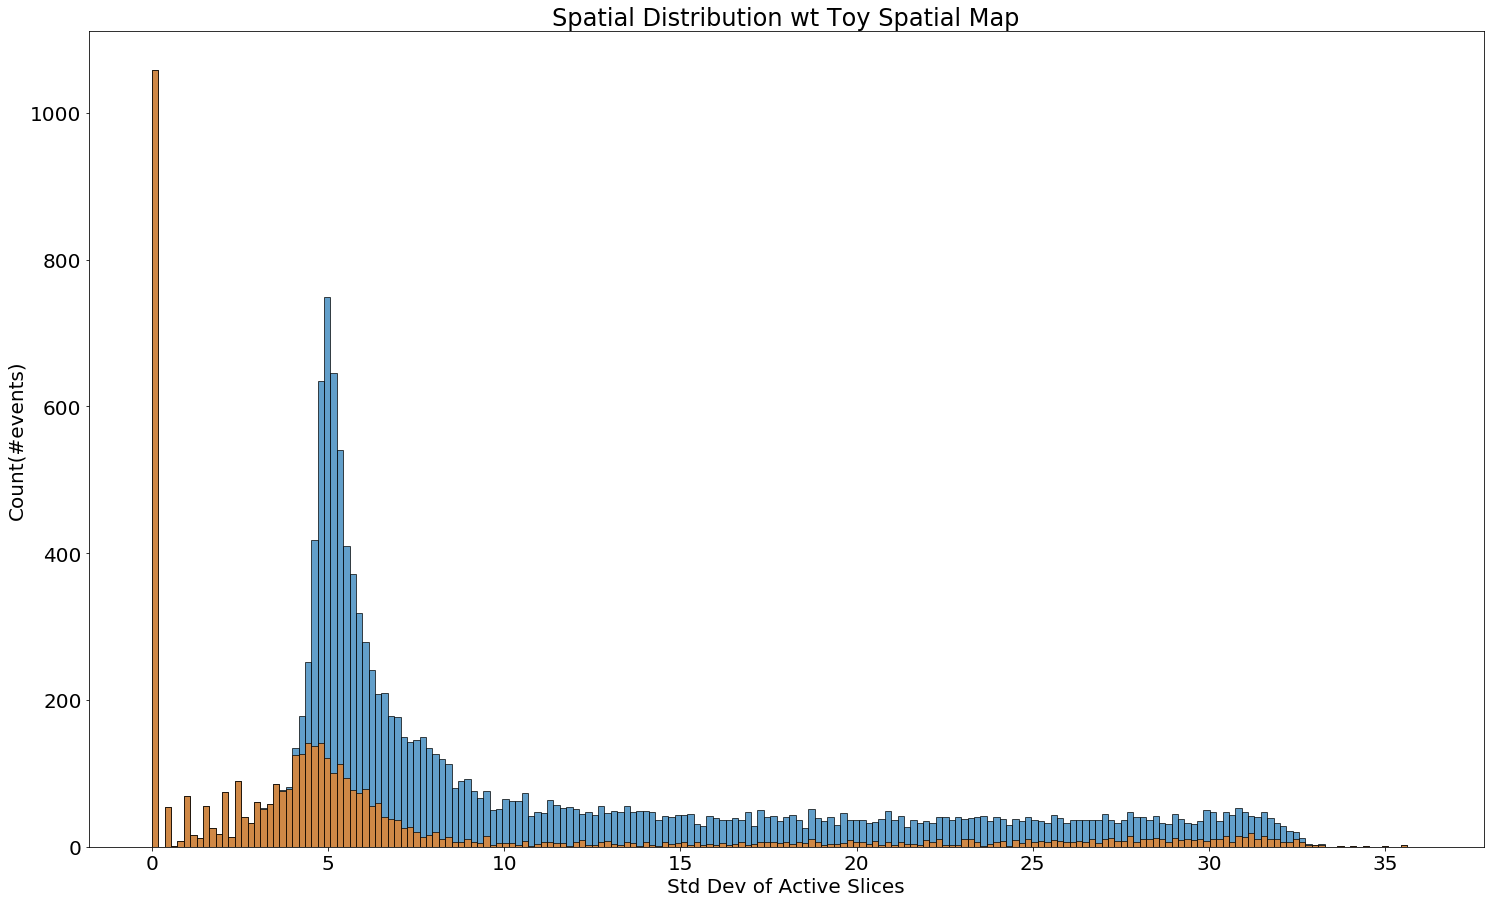

In [52]:
plt.hist(mu_std, bins=np.linspace(0, 36, 200), density=False, label="All Muons", alpha=0.7, edgecolor="k")
plt.hist(lemu_std, bins=np.linspace(0, 36, 200), density=False, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="k")
plt.title("Spatial Distribution wt Toy Spatial Map")
plt.xlabel("Std Dev of Active Slices")
plt.ylabel("Count(#events)")
plt.show()

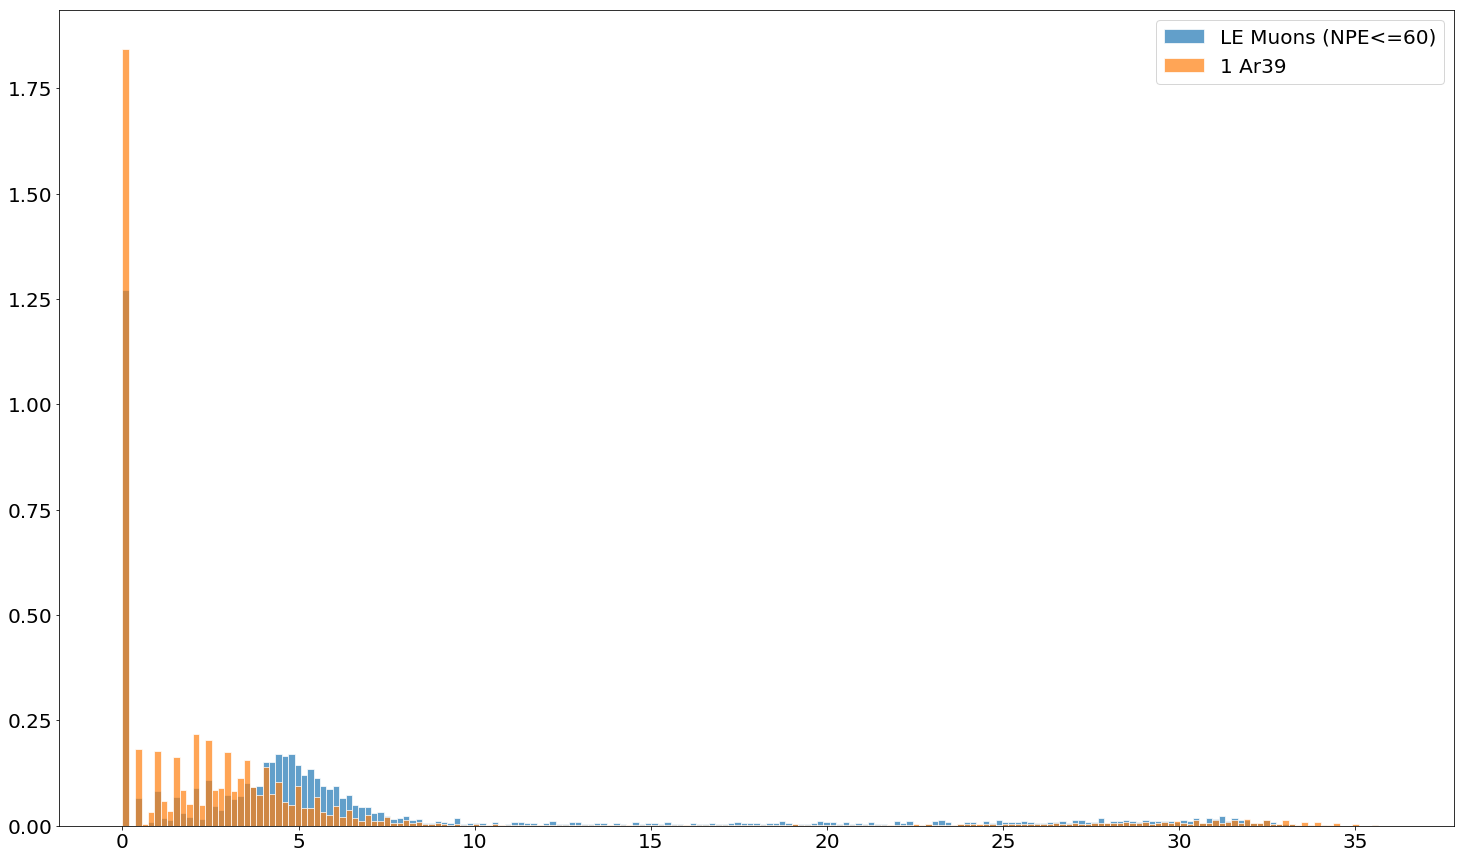

In [67]:
plt.hist(lemu_std, bins=np.linspace(0, 36, 200), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_std[:100000], bins=np.linspace(0, 36, 200), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.legend()
plt.show()

In [57]:
# Load 7 Ar39
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39", "Snapshot7Ar39")
prefix = "SnapshotAr39_*csv"

df_7ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
df_7ar39 = df_7ar39[df_7ar39.columns[:-1]]
df_7ar39 = df_7ar39[df_7ar39.pedetected>0]

....................................................................................................


In [59]:
ar39_7_std = df_7ar39.iloc[:, 3:].apply(stddev_idslices_fun, axis=1)

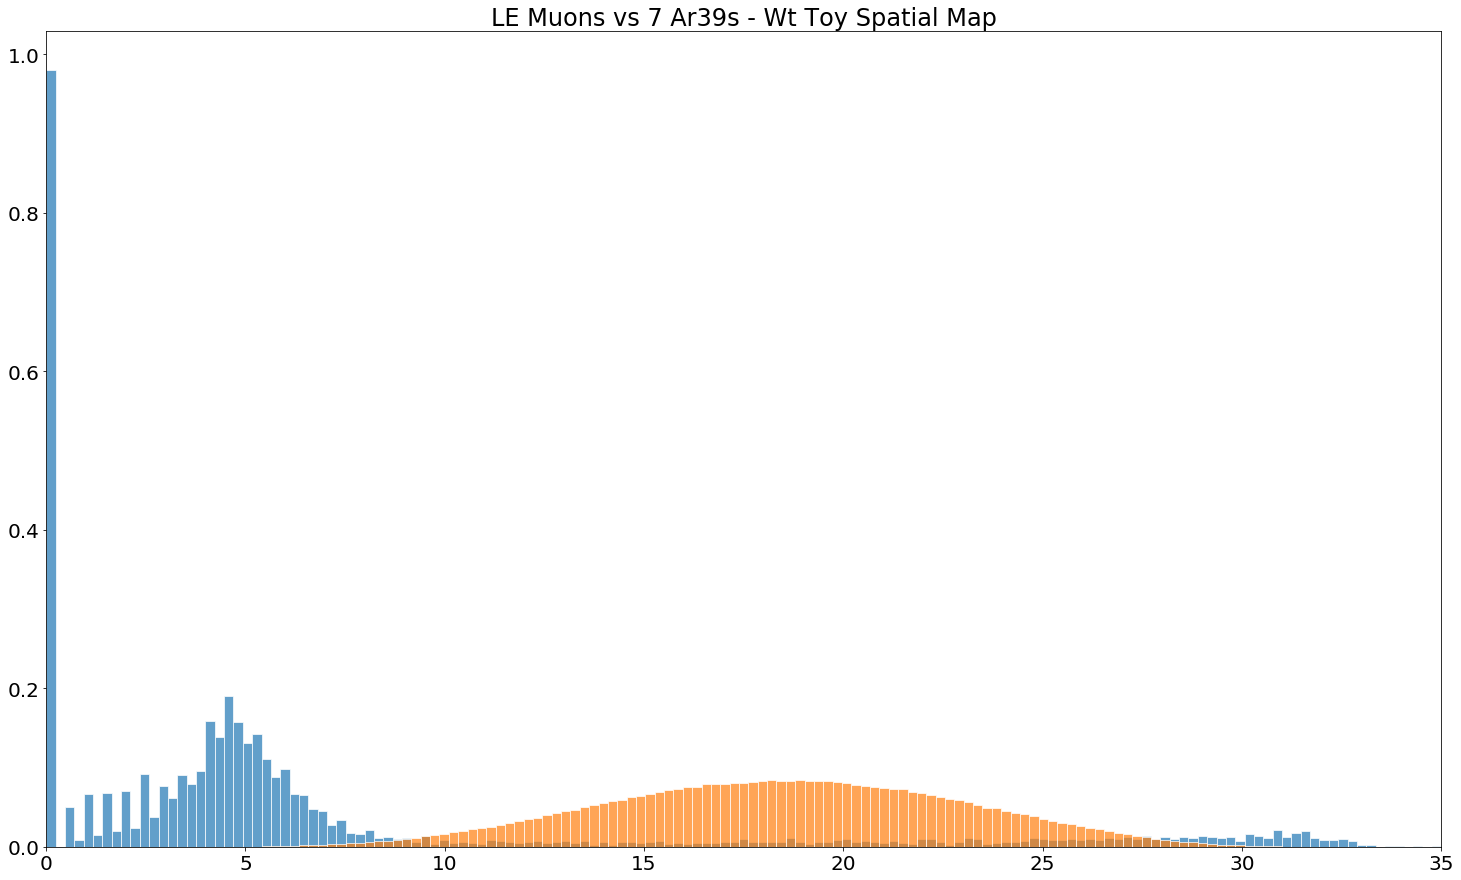

In [66]:
plt.hist(lemu_std, bins=np.linspace(0, 35, 150), density=True, label="LE Muons (NPE<=60)", alpha=0.7, edgecolor="w")
plt.hist(ar39_7_std, bins=np.linspace(0, 35, 150), density=True, label="1 Ar39", alpha=0.7, edgecolor="w")
plt.xlim(0, 35)
plt.title("LE Muons vs 7 Ar39s - Wt Toy Spatial Map")
plt.show()

In [79]:
# Load Old 1 Ar39
dirin = os.path.join("..", "..", "ML4GeneralMuons", "data", "Ar39", "dataset200000")
prefix = "Ar39_1Pileup*csv"

olddf_ar39 = load_dataframe_from_files(dirin, prefix, max_files=100)
olddf_ar39 = olddf_ar39[olddf_ar39.columns[:-1]]
olddf_ar39 = olddf_ar39[olddf_ar39.pedetected>0]

.

IndexError: list index out of range

In [75]:
ar39_old_std = olddf_ar39.iloc[:, 1:].apply(stddev_idslices_fun, axis=1)

/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


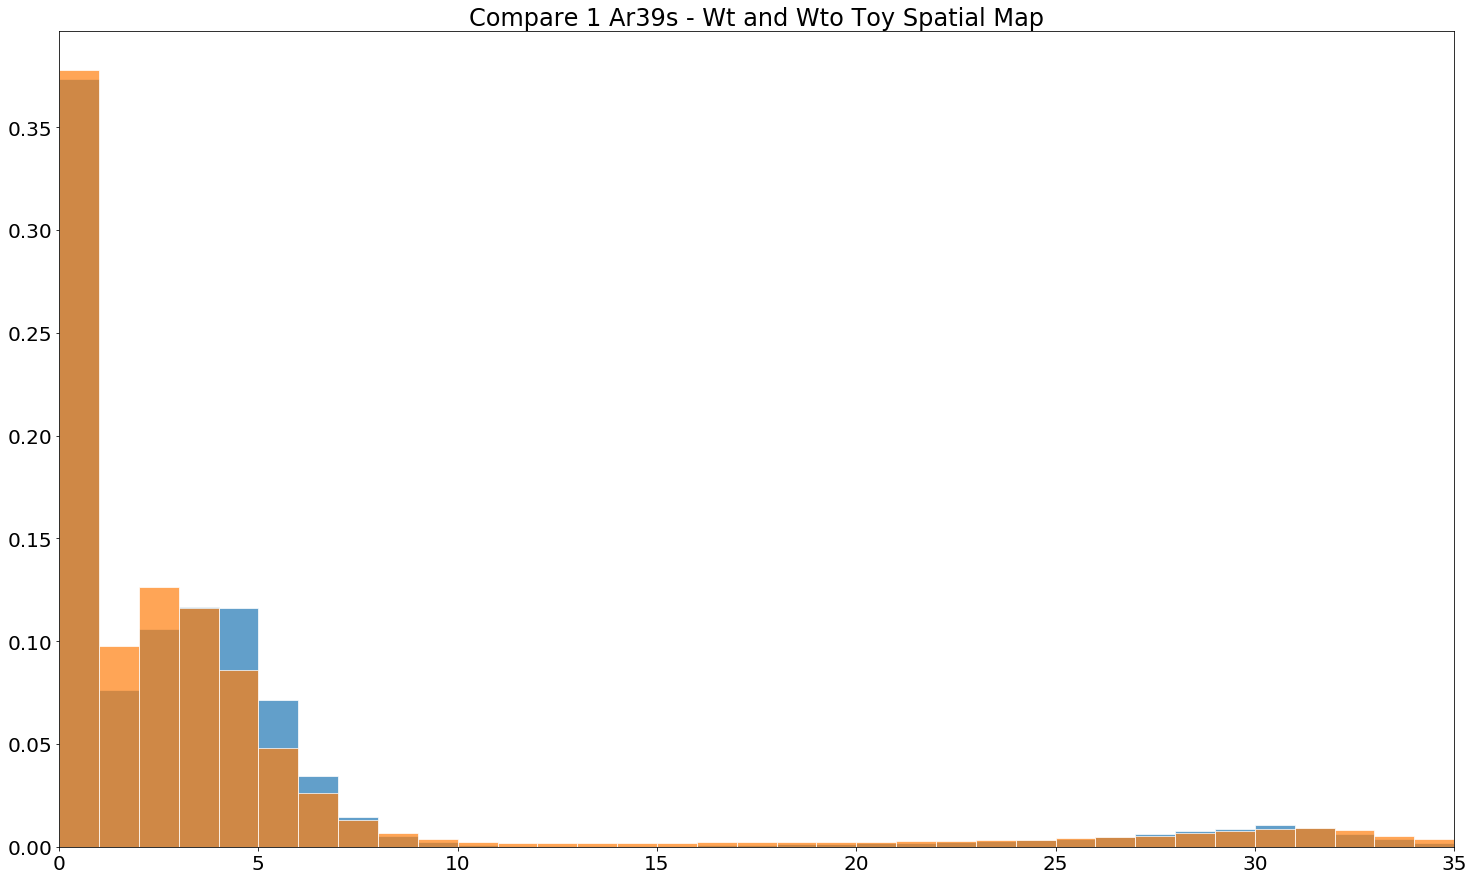

In [78]:
plt.hist(ar39_old_std, bins=np.linspace(0, 35, 36), density=True, label="With Gaus Sampling", alpha=0.7, edgecolor="w")
plt.hist(ar39_std, bins=np.linspace(0, 35, 36), density=True, label="With Spatial Map", alpha=0.7, edgecolor="w")
plt.xlim(0, 35)
plt.title("Compare 1 Ar39s - Wt and Wto Toy Spatial Map")
plt.show()